In [15]:
# pandas에서 제공하는 파일 입출력
import pandas as pd


In [17]:
file = pd.read_csv('./dataset/ex_1.csv') # 첫 행을 컬럼명으로 인식
df = pd.DataFrame(file) 
df

,수,10,10.1,10.2
0,우,20,20,20
1,미,30,30,30
2,양,40,40,40
3,슈,10,10,10
4,뷰,20,20,20


In [21]:
file = pd.read_csv('./dataset/ex_1.csv', header=None) # 첫 행을 데이터로 인식
df1 = pd.DataFrame(file) 
df1

,0,1,2,3
0,수,10,10,10
1,우,20,20,20
2,미,30,30,30
3,양,40,40,40
4,슈,10,10,10
5,뷰,20,20,20


In [24]:
# index 컬럼을 c0으로 설정
file = pd.read_csv('./dataset/ex_1.csv', index_col='수')
df2 = pd.DataFrame(file)

df2

,10,10.1,10.2
수,,,
우,20,20,20
미,30,30,30
양,40,40,40
슈,10,10,10
뷰,20,20,20


In [25]:
df2.to_csv('./dataset/to_ex_1.csv')

In [95]:
# excel 파일 read
df1 = pd.read_excel('dataset/남북한발전전력량.xlsx')
print(df1)
print(df1.columns)

# header 미적용

df2 = pd.read_excel('dataset/남북한발전전력량.xlsx', header=None)
print(df2)
print(df2.columns)




  전력량 (억㎾h) 발전 전력별  1990  1991  1992  1993  1994  1995  1996  1997  ...  2007  \
0        남한     합계  1077  1186  1310  1444  1650  1847  2055  2244  ...  4031   
1       NaN     수력    64    51    49    60    41    55    52    54  ...    50   
2       NaN     화력   484   573   696   803  1022  1122  1264  1420  ...  2551   
3       NaN    원자력   529   563   565   581   587   670   739   771  ...  1429   
4       NaN    신재생     -     -     -     -     -     -     -     -  ...     -   
5        북한     합계   277   263   247   221   231   230   213   193  ...   236   
6       NaN     수력   156   150   142   133   138   142   125   107  ...   133   
7       NaN     화력   121   113   105    88    93    88    88    86  ...   103   
8       NaN    원자력     -     -     -     -     -     -     -     -  ...     -   

   2008  2009  2010  2011  2012  2013  2014  2015  2016  
0  4224  4336  4747  4969  5096  5171  5220  5281  5404  
1    56    56    65    78    77    84    78    58    66  
2  2658  2802  

In [59]:
# json 읽어오기
df3 = pd.read_json('dataset/read_json_sample.json')
print(df3)
print(type(df3))
print(df3.index)

           name  year        developer opensource
pandas           2008    Wes Mckinneye       True
NumPy            2006  Travis Oliphant       True
matplotlib       2003   John D. Hunter       True
<class 'pandas.core.frame.DataFrame'>
Index(['pandas', 'NumPy', 'matplotlib'], dtype='object')


In [80]:
# html 읽어오기
# df4 = pd.read_html('dataset/sample.html')
# print(df4)

url = 'dataset/sample.html'

tables = pd.read_html(url)
# 테이블의 갯수 확인
print(len(tables))
      
# 테이블의 리스트와 원소를 출력
for i in range(len(tables)):
    print('tables : '.format('i'))
    print(tables[i])
    print()
    
      

2
tables : 
   Unnamed: 0  c0  c1  c2  c3
0           0   0   1   4   7
1           1   1   2   5   8
2           2   2   3   6   9

tables : 
         name  year        developer  opensource
0       NumPy  2006  Travis Oliphant        True
1  matplotlib  2003   John D. Hunter        True
2      pandas  2008    Wes Mckinneye        True



In [81]:
# 데이터 프레임에 table[1]의 정보를 대입
df = tables[1]
print(df)
# 데이터 프레임에 'name' 컬럼을 인덱스로 설정
df.set_index('name', inplace=True)
print(df)

         name  year        developer  opensource
0       NumPy  2006  Travis Oliphant        True
1  matplotlib  2003   John D. Hunter        True
2      pandas  2008    Wes Mckinneye        True
            year        developer  opensource
name                                         
NumPy       2006  Travis Oliphant        True
matplotlib  2003   John D. Hunter        True
pandas      2008    Wes Mckinneye        True


In [86]:
# year 컬럼을 기준으로 정렬
df.sort_values(by = 'year')

,year,developer,opensource
name,,,
matplotlib,2003,John D. Hunter,True
NumPy,2006,Travis Oliphant,True
pandas,2008,Wes Mckinneye,True


In [91]:
# csv 파일로 저장
df.to_csv('dataset/sample.csv')

# json 파일로 저장
df.to_json('dataset/to_json.json')

# excel 파일로 저장
df.to_excel('dataset/to_excel.xlsx')

In [94]:
# 여러개의 데이터프레임을 하나의 엑셀 파일로 저장

writer = pd.ExcelWriter('dataset/to_excel_writer.xlsx')
df.to_excel(writer, sheet_name='sheet1')
df3.to_excel(writer, sheet_name='sheet3')
writer.save()

In [122]:
# 데이터 프레임 살펴보기

df = pd.read_csv('dataset/auto-mpg.csv', header=None)

df.columns = ['mpg', 'cyliners', 'displacement', 'horsepower', 
              'weight', 'acceleration', 'model_year', 'origin', 'name']

df.head() # 자료의 처음에서 5개의 행을 가져 옴
df.tail() # 자료의 끝에서 5개의 행을 가져 옴




,mpg,cyliners,displacement,horsepower,weight,acceleration,model_year,origin,name
393,27.0,4,140.0,86.00,2790.0,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52.00,2130.0,24.6,82,2,vw pickup
395,32.0,4,135.0,84.00,2295.0,11.6,82,1,dodge rampage
396,28.0,4,120.0,79.00,2625.0,18.6,82,1,ford ranger
397,31.0,4,119.0,82.00,2720.0,19.4,82,1,chevy s-10


In [102]:
# 데이터프레임의 기본 정보 : info()
# 인덱스의 갯수, 컬럼의 정보를 보여 줌
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cyliners      398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [112]:
# 데이터프레임의 기술 통계 정보 요약 : decribe()
df.describe()

# 각 열의 데이터 갯수 : count(), 실제 값이 존재하는 자료만 count
df.count()


mpg             398
cyliners        398
displacement    398
horsepower      398
weight          398
acceleration    398
model_year      398
origin          398
name            398
dtype: int64

In [115]:
import seaborn as sns
df = sns.load_dataset('titanic')
df.count(0)

survived       891
pclass         891
sex            891
age            714
sibsp          891
parch          891
fare           891
embarked       889
class          891
who            891
adult_male     891
deck           203
embark_town    889
alive          891
alone          891
dtype: int64

In [133]:
# 각 열의 고유 값의 갯수 : df[열이름].value_counts()
df['origin'].value_counts()

# 열의 평균 값 : df[열이름].mean()
df['mpg'].mean()

# 각 열의 평균값 -> numeric_only=True
df.median(numeric_only=True)
df[['mpg', 'weight']].mean()

# 열의 중간 값 : median()
df[['mpg', 'weight']].median()

# 열의 최대, 최소 값
df[['mpg', 'weight']].max()
df[['mpg', 'weight']].min()

# 열의 표준 편차 값
df[['mpg', 'weight']].std()

# 열의 상관계수 값
df[['mpg', 'weight']].corr()


,mpg,weight
mpg,1.000000,-0.831741
weight,-0.831741,1.000000


In [151]:
# titanic 자료를 가지고 와서 titanic 기본 정보
# 기술통계 요약, 같은 나이의 인원 수 
# 전체 데이터의 평균, 중간값, 최대,최소 표준편자
# 각열의 유효한 자료의 갯수 확인

import seaborn as sns
df = sns.load_dataset('titanic')

df.info()
df.describe()
df['age'].value_counts().head()
df.median(numeric_only=True)
df.max(numeric_only=True)
df.min(numeric_only=True)
df.std(numeric_only=True)
df.count()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


survived       891
pclass         891
sex            891
age            714
sibsp          891
parch          891
fare           891
embarked       889
class          891
who            891
adult_male     891
deck           203
embark_town    889
alive          891
alone          891
dtype: int64

In [153]:
# 타이타닉 자료에서 class가 'First'인 자료만 검색
df[df['class'] == 'First'].loc[:, ['class', 'age']]

,class,age
1,First,38.0
3,First,35.0
6,First,54.0
11,First,58.0
23,First,28.0
...,...,...
871,First,47.0
872,First,33.0
879,First,56.0
887,First,19.0


In [163]:
# 클래스가 'First'이고 나이가 평균 나이보다 적은 사람의 자료만 출력
# sex, age, class, alive 컬러만 출력
# a == 10 & b == 20 : pandas & | 를 사용
df_bool = (df['class'] == 'First') & (df['age'].mean() < df['age'])

df = df[df_bool]

df1 = df.loc[:, ['sex', 'age', 'class', 'alive']]

df1

df2 = df[(df['class'] == 'First') & (df['age'].mean() > df['age'])].loc[:, ['sex', 'age', 'class', 'alive']]
df2.info()
df2.describe()
df2['alive'].value_counts() # 생존자와 사망자 수 확인


<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   sex     0 non-null      object  
 1   age     0 non-null      float64 
 2   class   0 non-null      category
 3   alive   0 non-null      object  
dtypes: category(1), float64(1), object(2)
memory usage: 132.0+ bytes


Series([], Name: alive, dtype: int64)

In [ ]:
# 데이터 전처리 작업

# 외부에서 데이터를 가져 옴
# 1. info() : 컬럼의 정보, 데이터의 갯수
# 2. 통계정보 describe()
# 3. head() 전체 자료의 5개의 인덱스만 확인
# 4. Nan 데이터가 있는지 확인 :  df.count()
# 5. Nan 데이터를 처리...
# 6. df.corr() 데이터간의 상관 관계 확인
# 7. 그래프로 자료를 확인





In [184]:
# pandas에서 제공하는 그래프 함수 plot()

df = pd.read_excel('dataset/남북한발전전력량.xlsx')

df.head(7)

# 남한과 북한의 1991년 이후 자료만 가지고 옴
df_ns = df.iloc[[0,5], 3:]
df_ns # 0와 5 인덱스명을 0: 'South', 5:'North' 인덱스명을 변경
df_ns.index = ['South', 'North']
df_ns

# 데이터의 정보 확인
df_ns.info() # object를 int 형으로 변경
df_ns.columns
df_ns.columns = df_ns.columns.map(int) # colums의 이름을 정수형으로 변경
df_ns.columns


<class 'pandas.core.frame.DataFrame'>
Index: 2 entries, South to North
Data columns (total 26 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   1991    2 non-null      object
 1   1992    2 non-null      object
 2   1993    2 non-null      object
 3   1994    2 non-null      object
 4   1995    2 non-null      object
 5   1996    2 non-null      object
 6   1997    2 non-null      object
 7   1998    2 non-null      object
 8   1999    2 non-null      object
 9   2000    2 non-null      object
 10  2001    2 non-null      object
 11  2002    2 non-null      object
 12  2003    2 non-null      object
 13  2004    2 non-null      object
 14  2005    2 non-null      object
 15  2006    2 non-null      object
 16  2007    2 non-null      object
 17  2008    2 non-null      object
 18  2009    2 non-null      object
 19  2010    2 non-null      object
 20  2011    2 non-null      object
 21  2012    2 non-null      object
 22  2013    2 non-null      obj

Int64Index([1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001,
            2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012,
            2013, 2014, 2015, 2016],
           dtype='int64')

<AxesSubplot:ylabel='Frequency'>

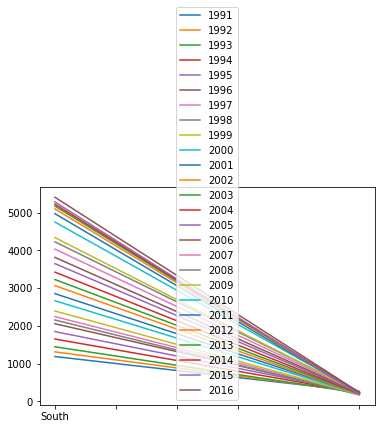

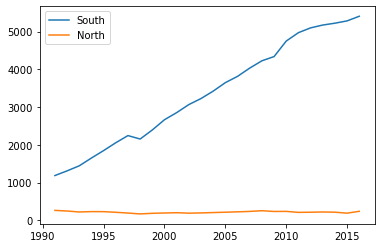

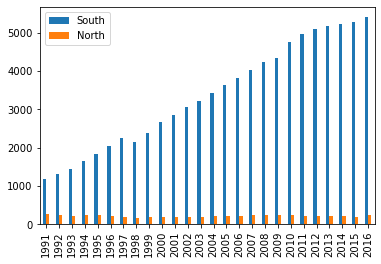

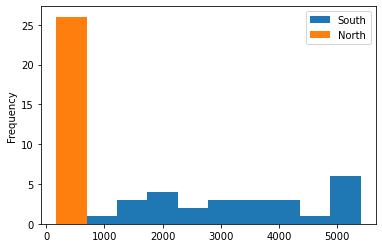

In [193]:
df_ns.plot() # index > x 축 년도를 기준으로 남한과 북한의 전력량을 확인
tdf_ns = df_ns.T # 인덱스와 컬럼의 위치 변환
tdf_ns.head()
tdf_ns.plot() # 남한과 북한의 연도별 전력량을 그래프로 표시

tdf_ns.plot(kind='bar')
tdf_ns.plot(kind='hist')

<AxesSubplot:>

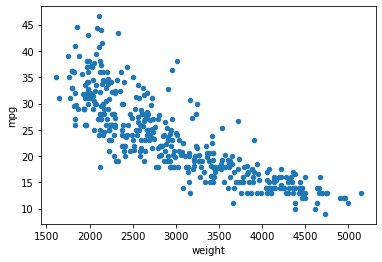

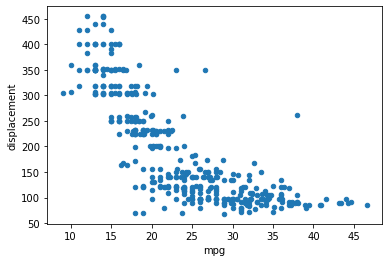

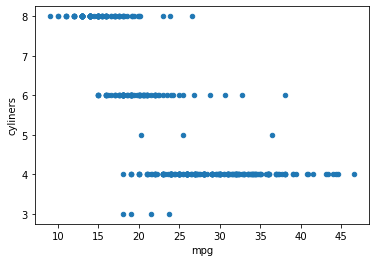

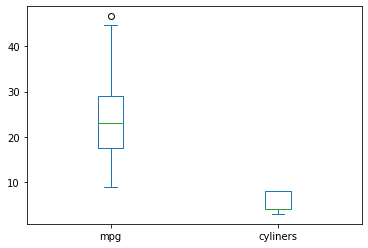

In [211]:
# auto-mpg.csv 파일을 읽어서 데이터프레임을 생성 , csv 데이터 확인, header 여부
# 컬러명을 지정 합니다.
# df.columns = ['mpg', 'cyliners', 'displacement', 'horsepower', 
#              'weight', 'acceleration', 'model_year', 'origin', 'name']
# 삼전도 kind = 'scatter', weight과 mpg 컬럼에 대해서
# weight과 mpg 컬럼의 상관관계도 표시
df = pd.read_csv('dataset/auto-mpg.csv', header=None)

df.columns = ['mpg', 'cyliners', 'displacement', 'horsepower', 
            'weight', 'acceleration', 'model_year', 'origin', 'name']

df
df[['weight', 'mpg']].corr()

df.plot(x='weight', y='mpg', kind='scatter')
df.plot(x='mpg', y='displacement', kind='scatter')
df.plot(x='mpg', y='cyliners', kind='scatter')


# 데이터의 이상점 발견 : boxplot -> plot(kind='box')

df[['mpg', 'cyliners']].plot(kind='box')


In [209]:
df.corr()

,mpg,cyliners,displacement,weight,acceleration,model_year,origin
mpg,1.000000,-0.775396,-0.804203,-0.831741,0.420289,0.579267,0.563450
cyliners,-0.775396,1.000000,0.950721,0.896017,-0.505419,-0.348746,-0.562543
displacement,-0.804203,0.950721,1.000000,0.932824,-0.543684,-0.370164,-0.609409
weight,-0.831741,0.896017,0.932824,1.000000,-0.417457,-0.306564,-0.581024
acceleration,0.420289,-0.505419,-0.543684,-0.417457,1.000000,0.288137,0.205873
model_year,0.579267,-0.348746,-0.370164,-0.306564,0.288137,1.000000,0.180662
origin,0.563450,-0.562543,-0.609409,-0.581024,0.205873,0.180662,1.000000
